In [1]:
import numpy as np 
import time 
import os  
import xarray as xr
import subprocess
import matplotlib.pyplot as plt
from matplotlib import colors
import cartopy.crs as ccrs

In [2]:
## import self defined functions
from sys import path 
# insert at 1, 0 is the script path (or '' in REPL)
path.insert(1, '/tigress/cw55/local/python_lib')
from cg_funcs import global_mean_xarray 

In [3]:
plt.rcParams['font.size'] = '6'

In [4]:
def plot_ds12_diff(ds_list,level = np.arange(0,300,10), dlevel = np.arange(-10,10.1,0.5)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i]
        da.plot(ax=ax, levels=level, extend='both')  
        ax.set_title(f'{da.name} GM: {global_mean_xarray(da).values:4.2f}') 
    ax=axs[2]
    da = ds_list[1]-ds_list[0]
    da.plot(ax=ax, levels=dlevel, extend='both') 
    # ax.set_title(f'diff mean: {(da.mean()).values:4.2f}')  
    ax.set_title(f'diff GM: {global_mean_xarray(da).values:4.2f}') 
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
    fig.tight_layout()  
def plot_zonal_ta_diff(ds_list,level = np.arange(200,330,10), dlevel = np.arange(-3,3.1,0.5)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i]
        da.plot(ax=ax, levels=level, extend='both')  
        ax.set_title(f'{da.name} mean: {(da.mean()).values:4.2f}')  
    ax=axs[2]
    da = (ds_list[1]-ds_list[0])
    da.plot(ax=ax, levels=dlevel, extend='both') 
    ax.set_title(f'diff mean: {(da.mean()).values:4.2f}')  
    # ax.set_title(f'diff GM: {global_mean_xarray(da).values:4.2f}') 
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
        ax.invert_yaxis()
    fig.tight_layout()  

def plot_zonal_tdt_diff(ds_list,level = np.arange(-2,2,0.1), dlevel = np.arange(-0.5,0.51,0.05)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i]
        da.plot(ax=ax, levels=level, extend='both')  
        ax.set_title(f'{da.name} mean: {(da.mean()).values:4.2f} [K/day]')  
    ax=axs[2]
    da = (ds_list[1]-ds_list[0])
    da.plot(ax=ax, levels=dlevel, extend='both') 
    ax.set_title(f'diff mean: {(da.mean()).values:4.2f} [K/day]')   
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
        ax.invert_yaxis()
    fig.tight_layout()  

def plot_GM_diff(ds_list,var_info):
    fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(3,2),dpi=200)
    ax=axs
    linesty = ['-', '--']
    for i in range(2): 
        # da = global_mean_xarray(ds_list[i].groupby('time.year').mean('time'))
        # ax.plot(da.year,da) 
        da = global_mean_xarray(ds_list[i])
        timeaxis = da.indexes['time'].to_datetimeindex()
        ax.plot(timeaxis,da,linestyle=linesty[i]) 
    if len(var_info) == 2: 
        ax.set_title(f'{var_info[0]} | {var_info[1]} = {da[var_info[1]].data}')   
    else:
        ax.set_title(f'{var_info}') 
    fig.tight_layout()  
    

# Climatology between HRadNN and control

## import data

In [5]:
year_list = np.arange(2000,2010)

In [6]:
file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_sstp1KpY_nn_stellarcpu_intelmpi_22_768PE/'
ds= xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_month.nc' for year in year_list])  
ds_nn= ds.rename({'grid_yt':'lat','grid_xt':'lon'})

file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_sstp1KpY_nn_stellarcpu_intelmpi_22_768PE_base/' 
ds= xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_month.nc' for year in year_list])  
ds_ba= ds.rename({'grid_yt':'lat','grid_xt':'lon'})

## plot results

### temp sturcture

GM trend


/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


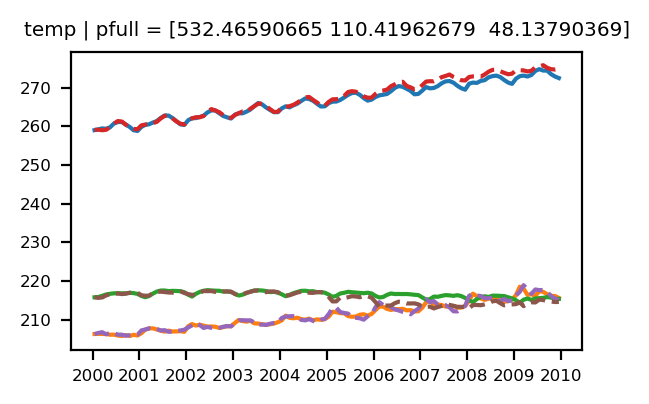

In [7]:
print('GM trend')
var = 'temp'
ds_list = [ds_ba[var].sel(pfull=[500,100,50],method='nearest'),
           ds_nn[var].sel(pfull=[500,100,50],method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull']) 


GM trend


/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
 

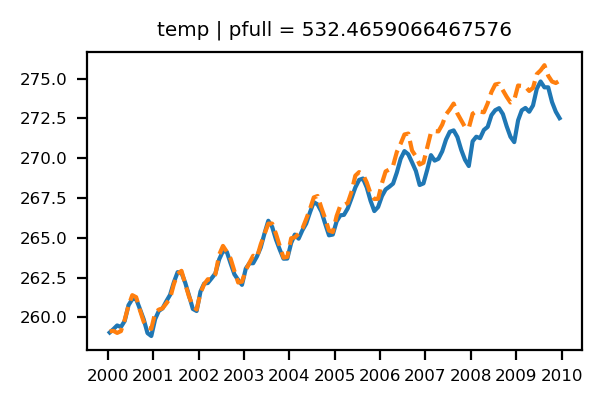

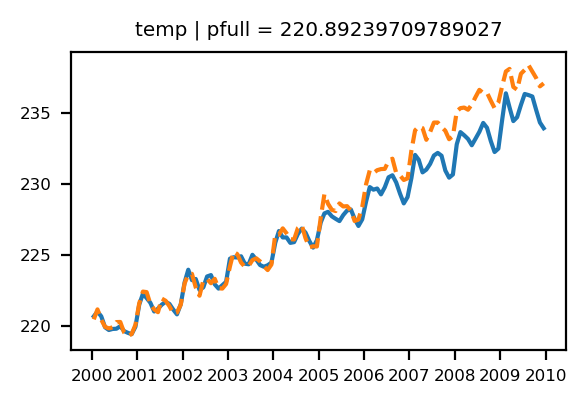

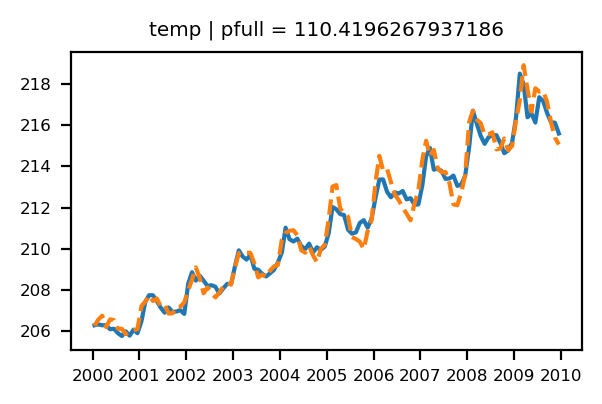

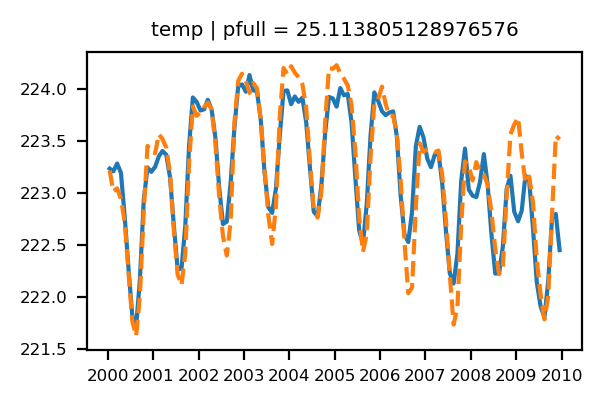

In [8]:

print('GM trend')
var = 'temp'
ds_list = [ds_ba[var].sel(pfull=500,method='nearest'),
           ds_nn[var].sel(pfull=500,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=200,method='nearest'),
           ds_nn[var].sel(pfull=200,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=100,method='nearest'),
           ds_nn[var].sel(pfull=100,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=30,method='nearest'),
           ds_nn[var].sel(pfull=30,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])


GM trend


/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


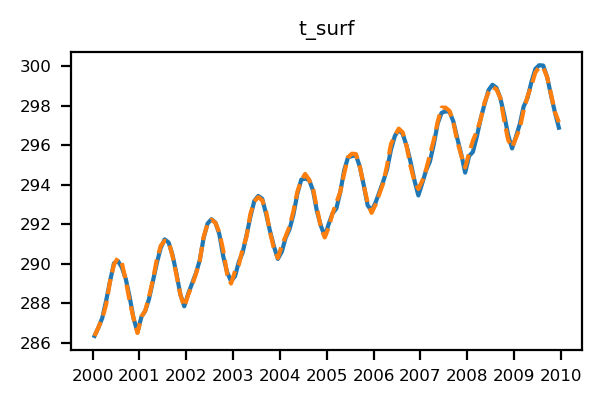

In [9]:
var = 't_surf' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 


GM trend


/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
 

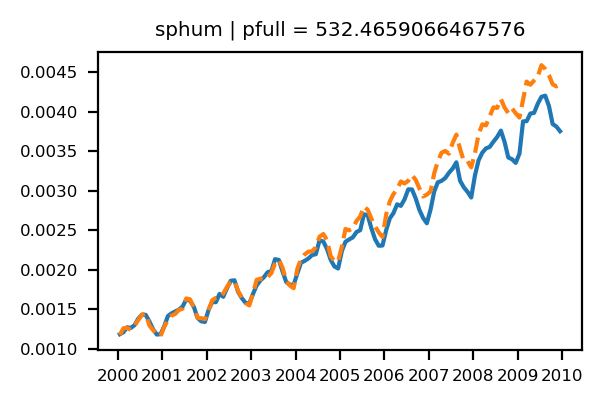

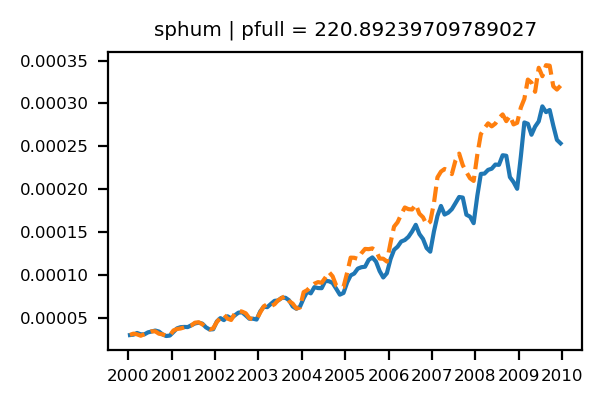

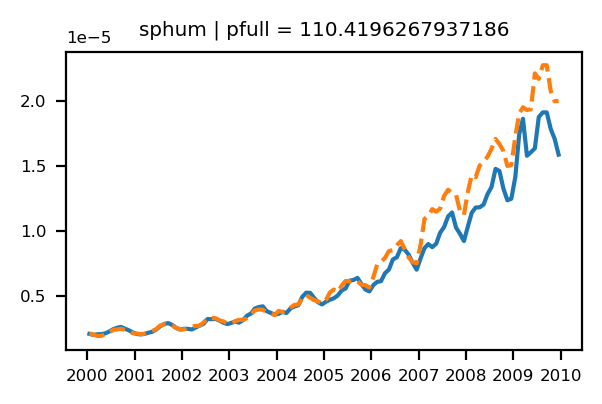

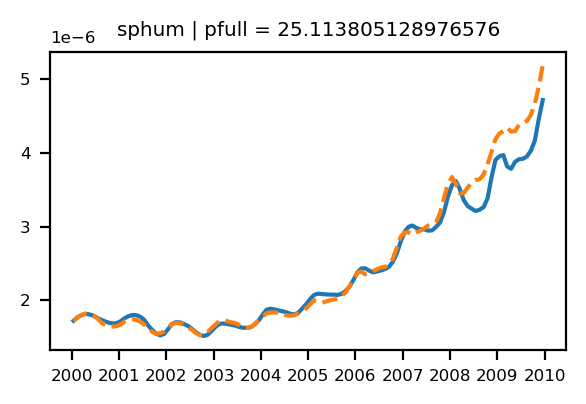

In [10]:

print('GM trend')
var = 'sphum'
ds_list = [ds_ba[var].sel(pfull=500,method='nearest'),
           ds_nn[var].sel(pfull=500,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=200,method='nearest'),
           ds_nn[var].sel(pfull=200,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=100,method='nearest'),
           ds_nn[var].sel(pfull=100,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=30,method='nearest'),
           ds_nn[var].sel(pfull=30,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])


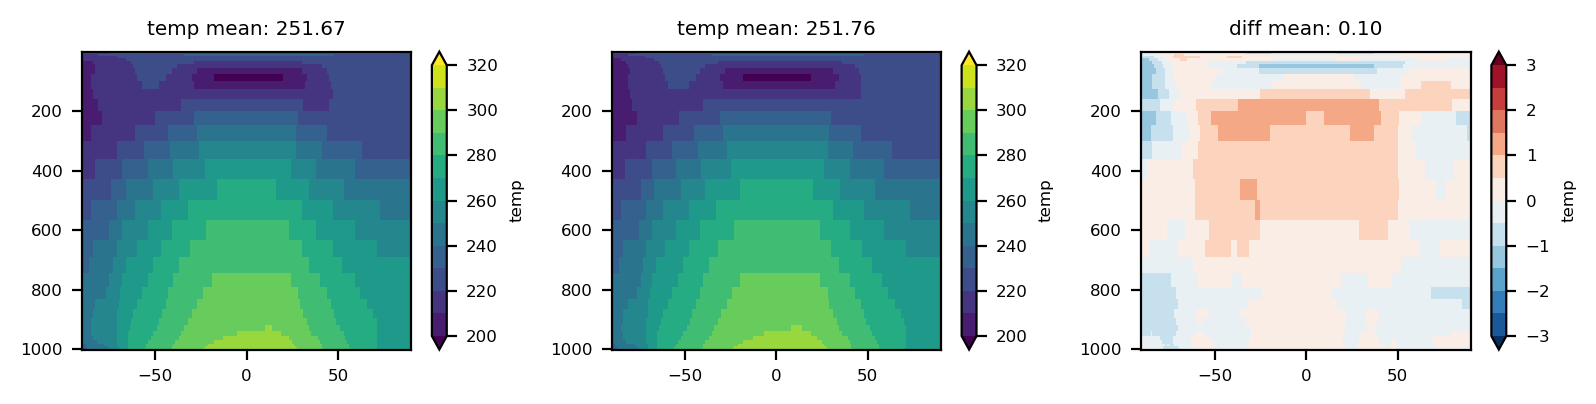

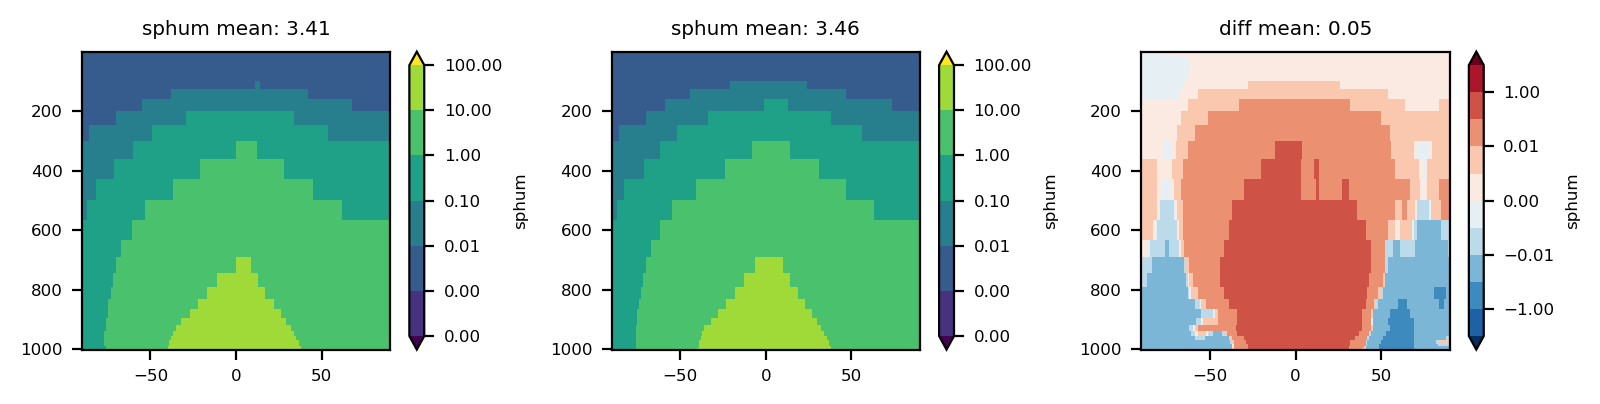

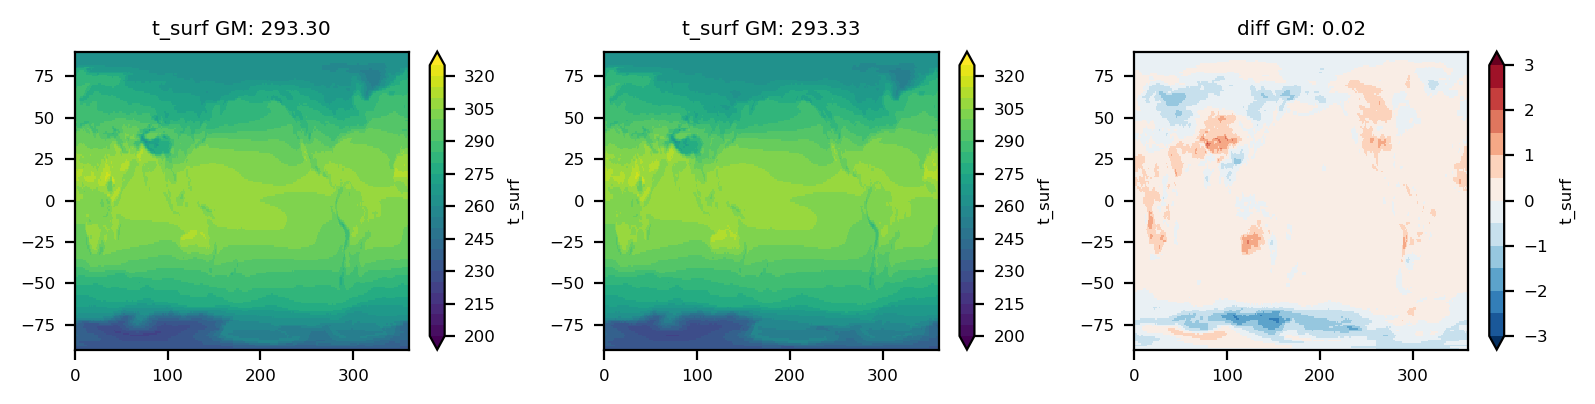

In [11]:
var = 'temp'
ds_list = [ds_ba[var].mean(['time','lon']).load(),
           ds_nn[var].mean(['time','lon']).load()]
plot_zonal_ta_diff(ds_list)

var = 'sphum'
ds_list = [ds_ba[var].mean(['time','lon']).load()*1e3,
           ds_nn[var].mean(['time','lon']).load()*1e3] # g/kg
loglevel = 10**np.arange(-4,3.0,1.0)
dloglevel = np.concatenate([-10**np.arange(1,-3.01,-1),[0],10**np.arange(-3.,1.01,1)])
plot_zonal_ta_diff(ds_list,level = loglevel, dlevel = dloglevel)

var = 't_surf'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(200,330,5), dlevel = np.arange(-3,3.1,0.5)) 

### lw flux by Rad_AM4

GM trend


/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


GM trend


/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


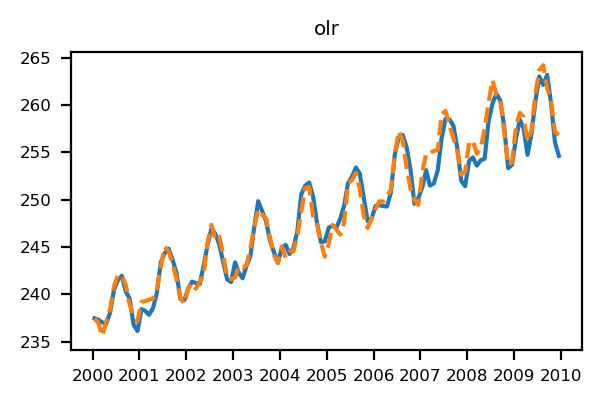

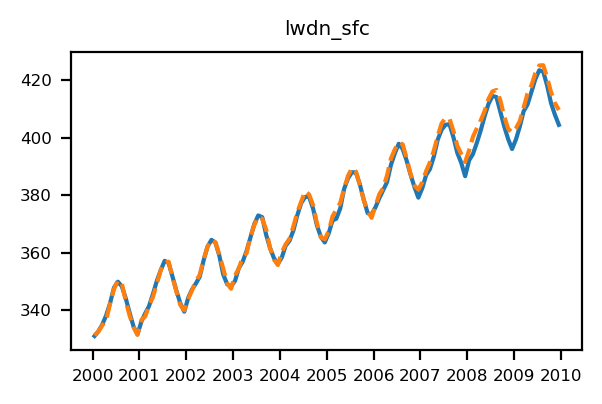

In [12]:
var = 'olr' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 
var = 'lwdn_sfc' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 


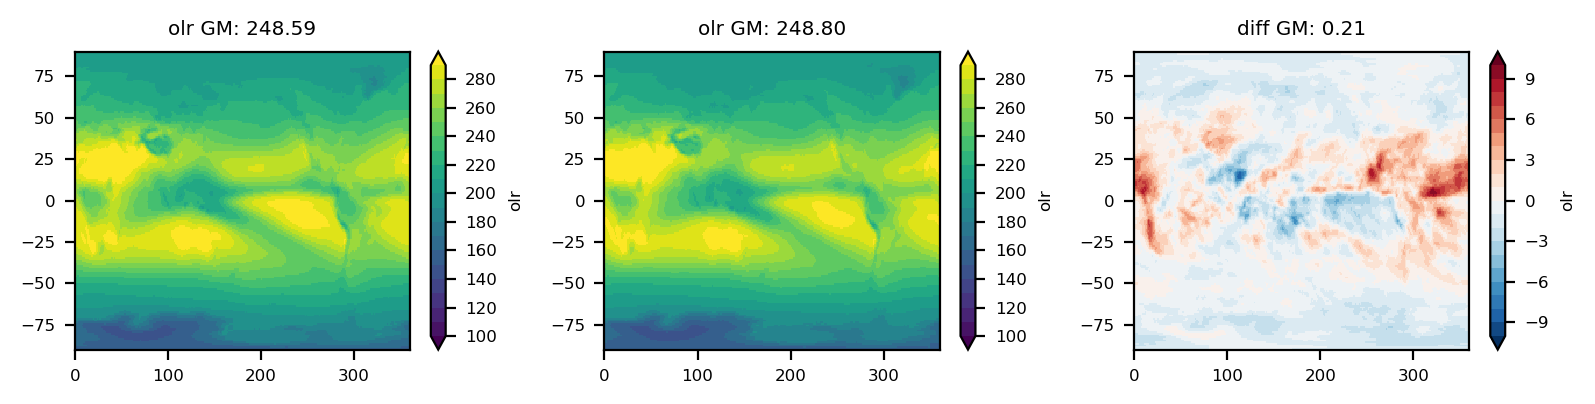

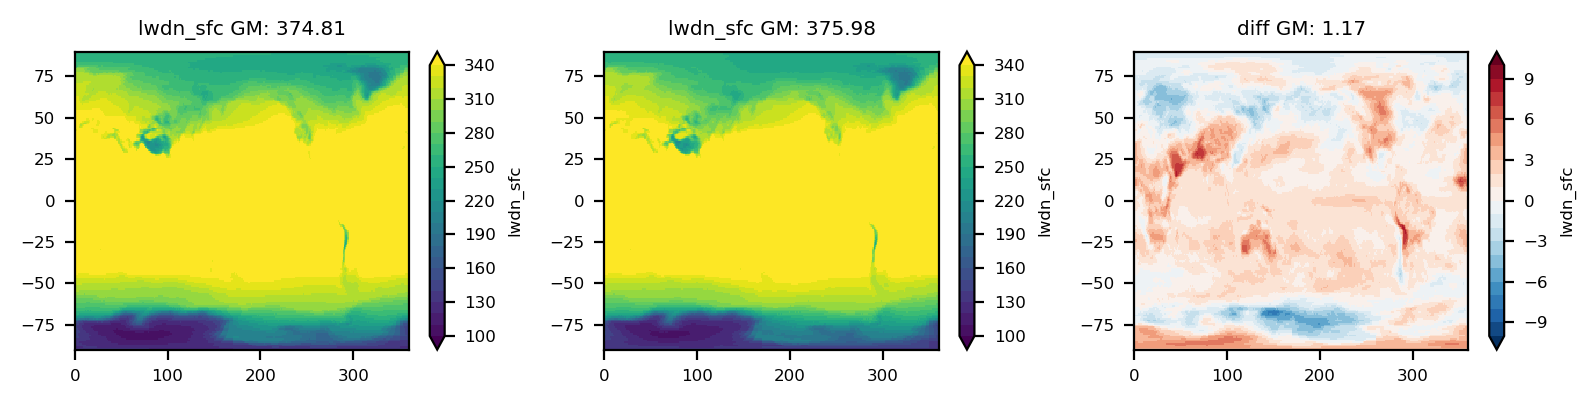

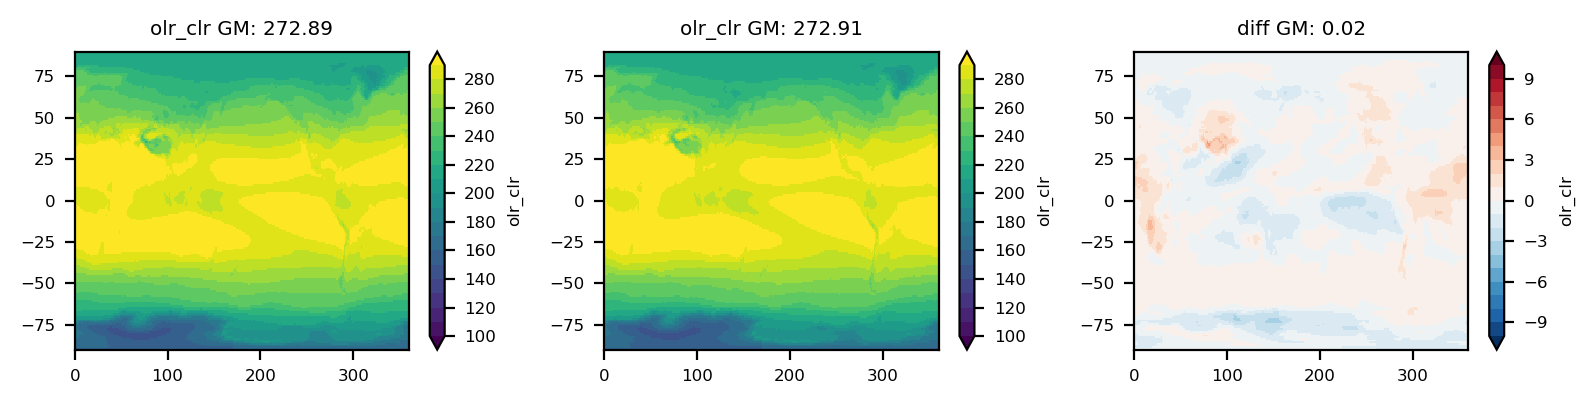

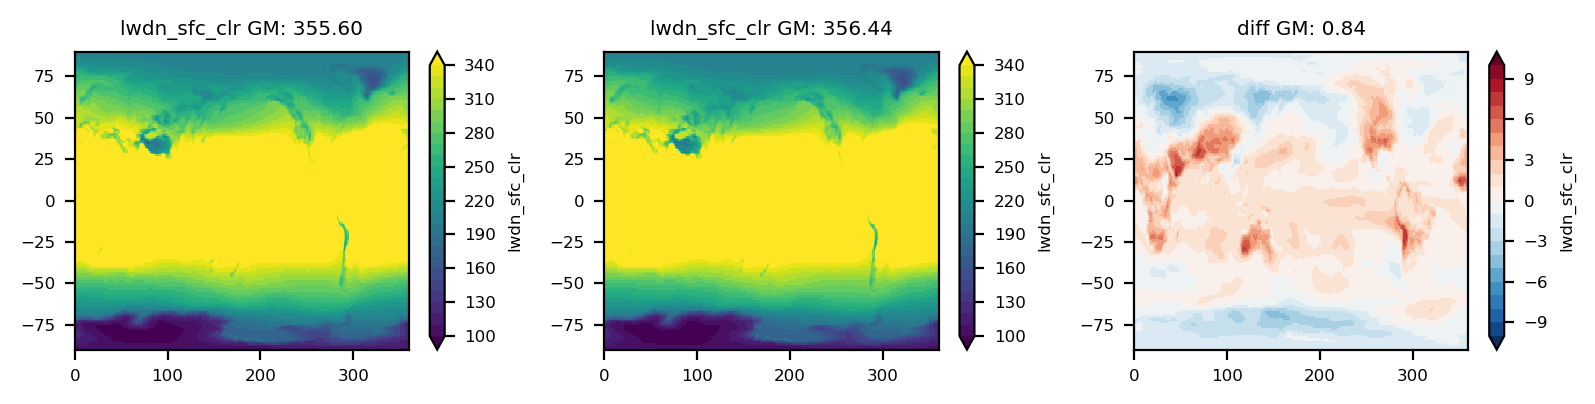

In [13]:
var = 'olr'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1)) 

var = 'lwdn_sfc'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,350,10), dlevel = np.arange(-10,10.1,1)) 
var = 'olr_clr'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1)) 

var = 'lwdn_sfc_clr'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,350,10), dlevel = np.arange(-10,10.1,1)) 

### sw flux by Rad_AM4

GM trend


/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


GM trend


/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


GM trend


/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_770797/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


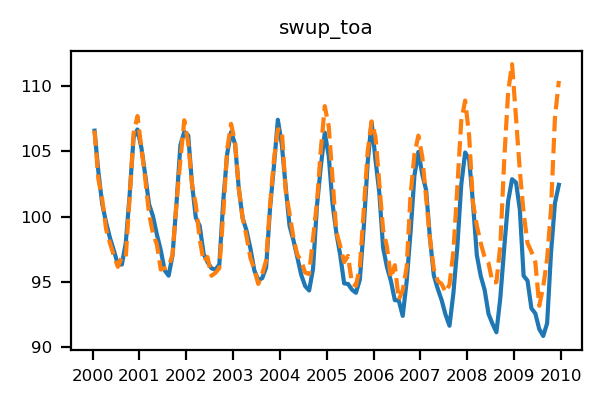

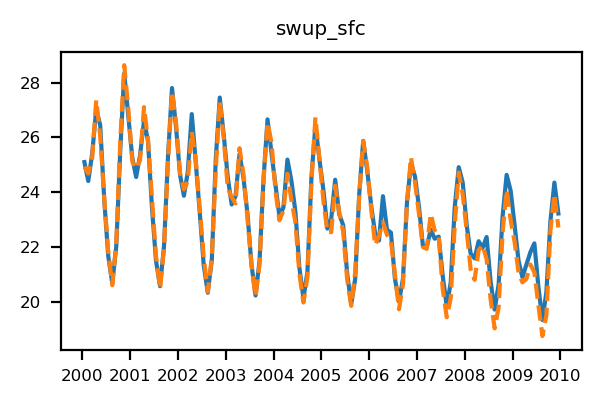

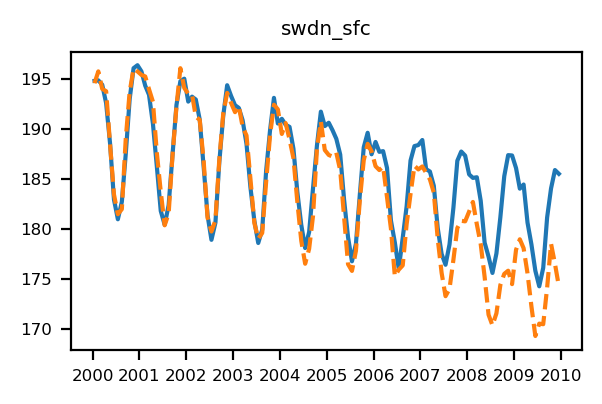

In [14]:
var = 'swup_toa' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var)
var = 'swup_sfc' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 
var = 'swdn_sfc' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 


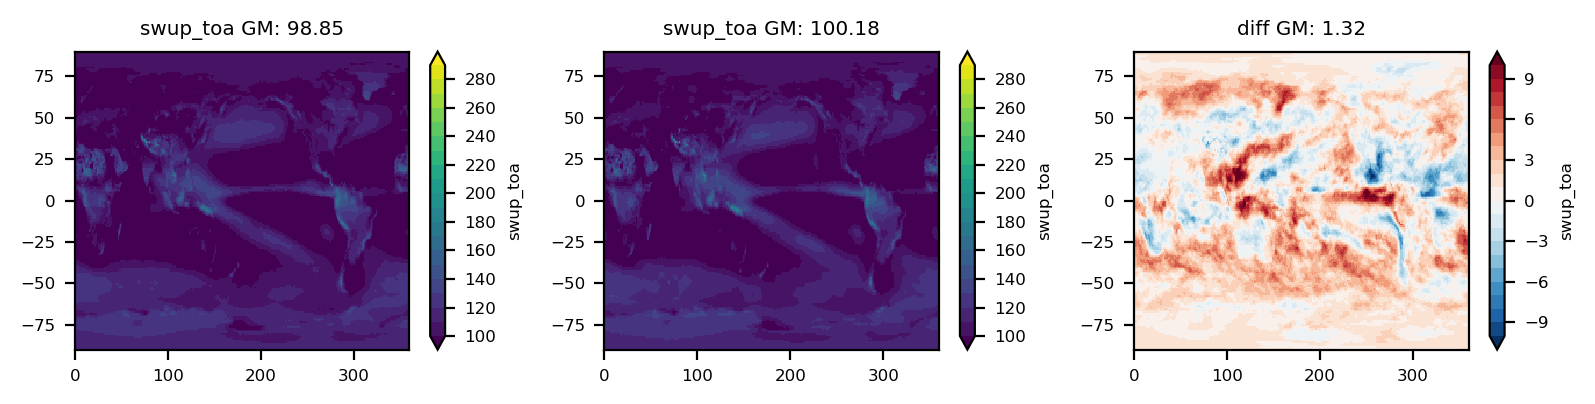

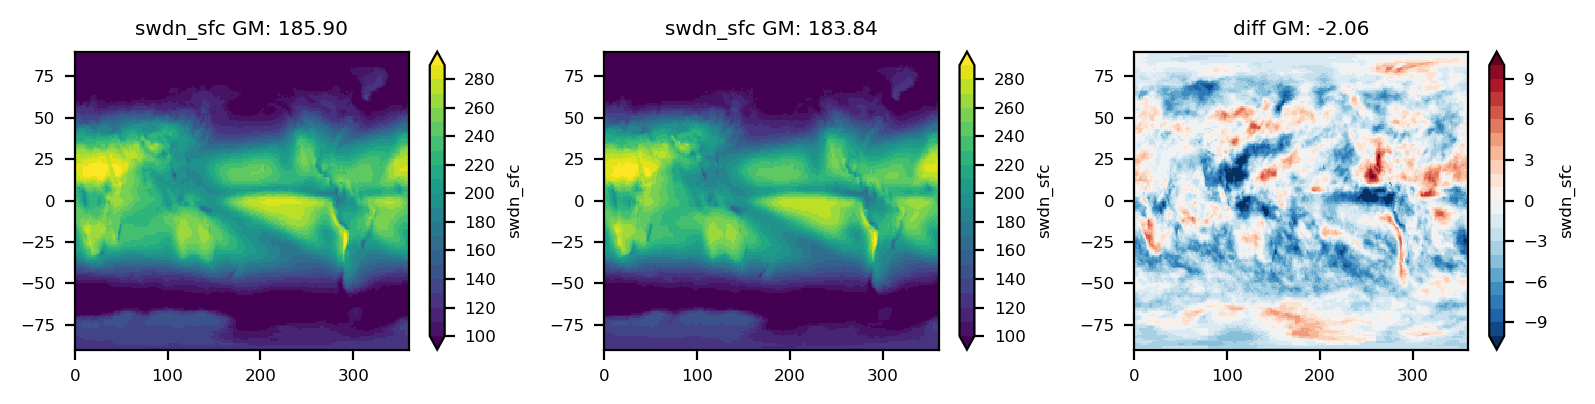

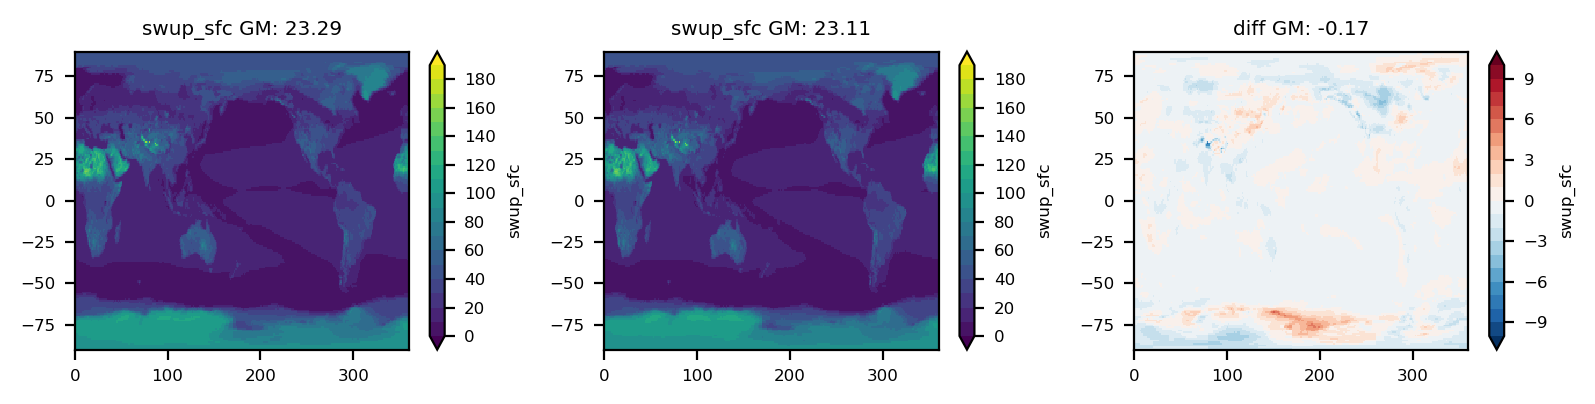

In [15]:
var = 'swup_toa'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1)) 
var = 'swdn_sfc'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1))
var = 'swup_sfc'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-10,10.1,1))  

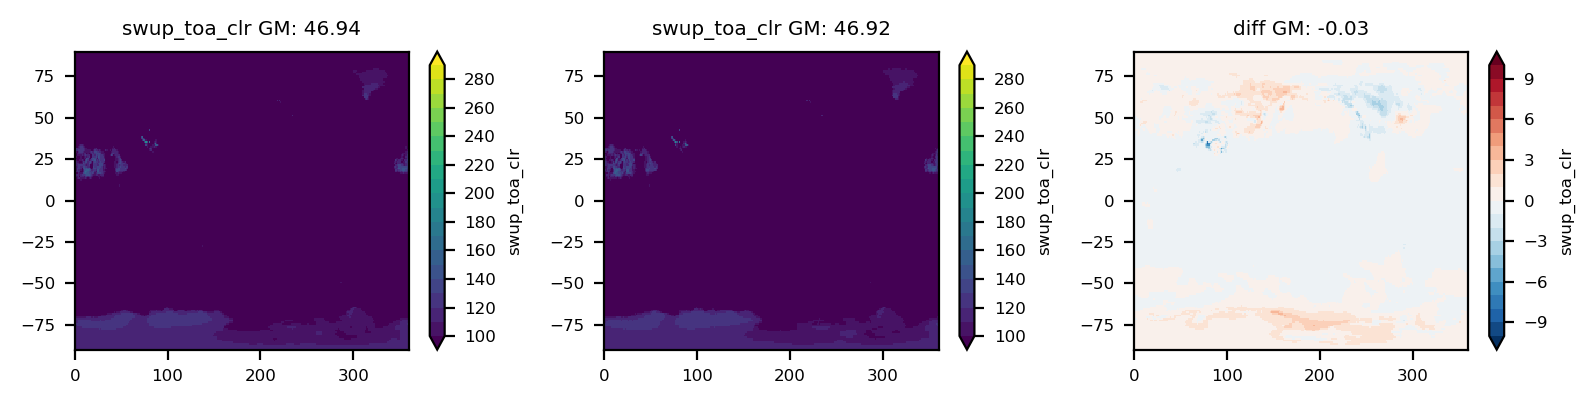

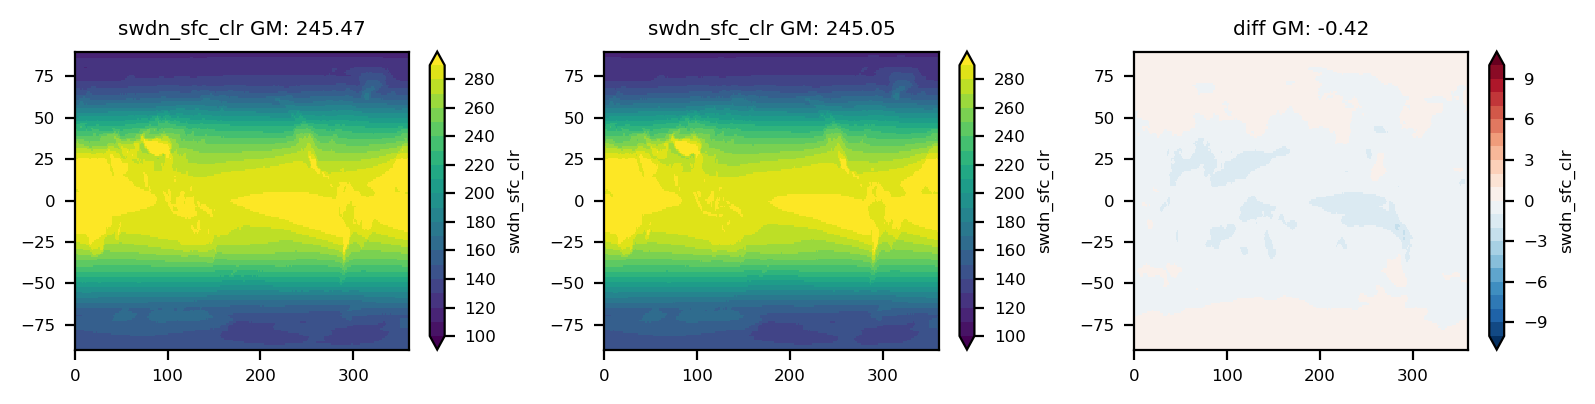

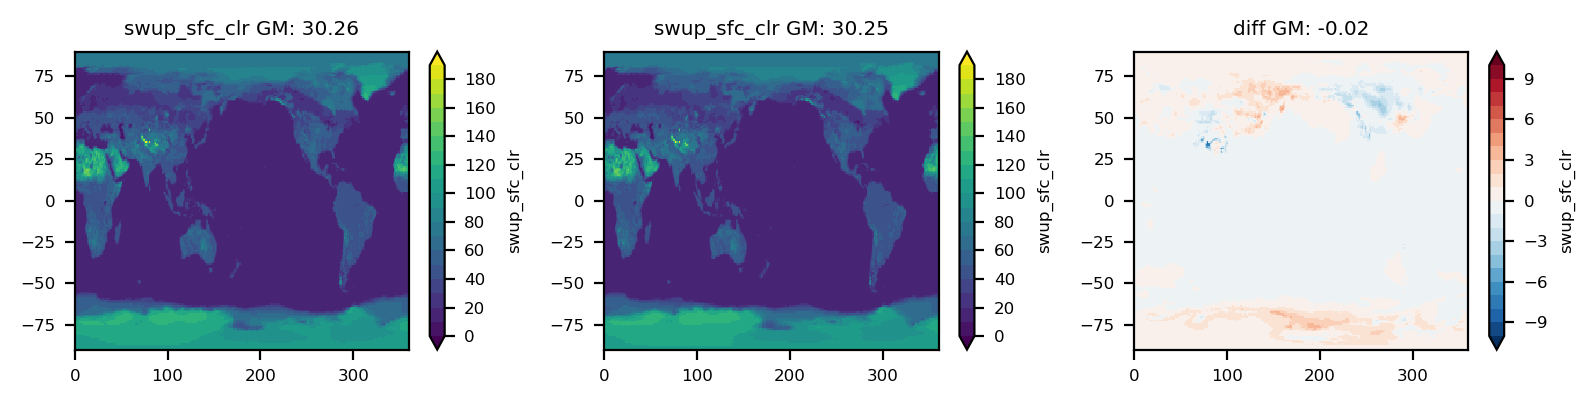

In [16]:
var = 'swup_toa_clr'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1)) 
var = 'swdn_sfc_clr'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1))
var = 'swup_sfc_clr'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-10,10.1,1))  

# HRadNN/RadNN performance on instantaneous steps

In [17]:
file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_sstp1KpY_nn_stellarcpu_intelmpi_22_768PE/'
ds= xr.open_mfdataset([file_path+f'HISTORY/{year}0101.atmos_8xdaily.monavg_error.nc' for year in year_list])  
ds_nn_3h = ds.rename({'grid_yt':'lat','grid_xt':'lon'})

file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_sstp1KpY_nn_stellarcpu_intelmpi_22_768PE_base/' 
ds= xr.open_mfdataset([file_path+f'HISTORY/{year}0101.atmos_8xdaily.monavg_error.nc' for year in year_list])  
ds_ba_3h = ds.rename({'grid_yt':'lat','grid_xt':'lon'})

## error of all- and clear-sky in time series

In [18]:
ori_var = [
    'olr',
    'lwdn_sfc',
    'swup_toa',
    'swdn_sfc',
    'swup_sfc',
]

olr
lwdn_sfc
swup_toa
swdn_sfc
swup_sfc


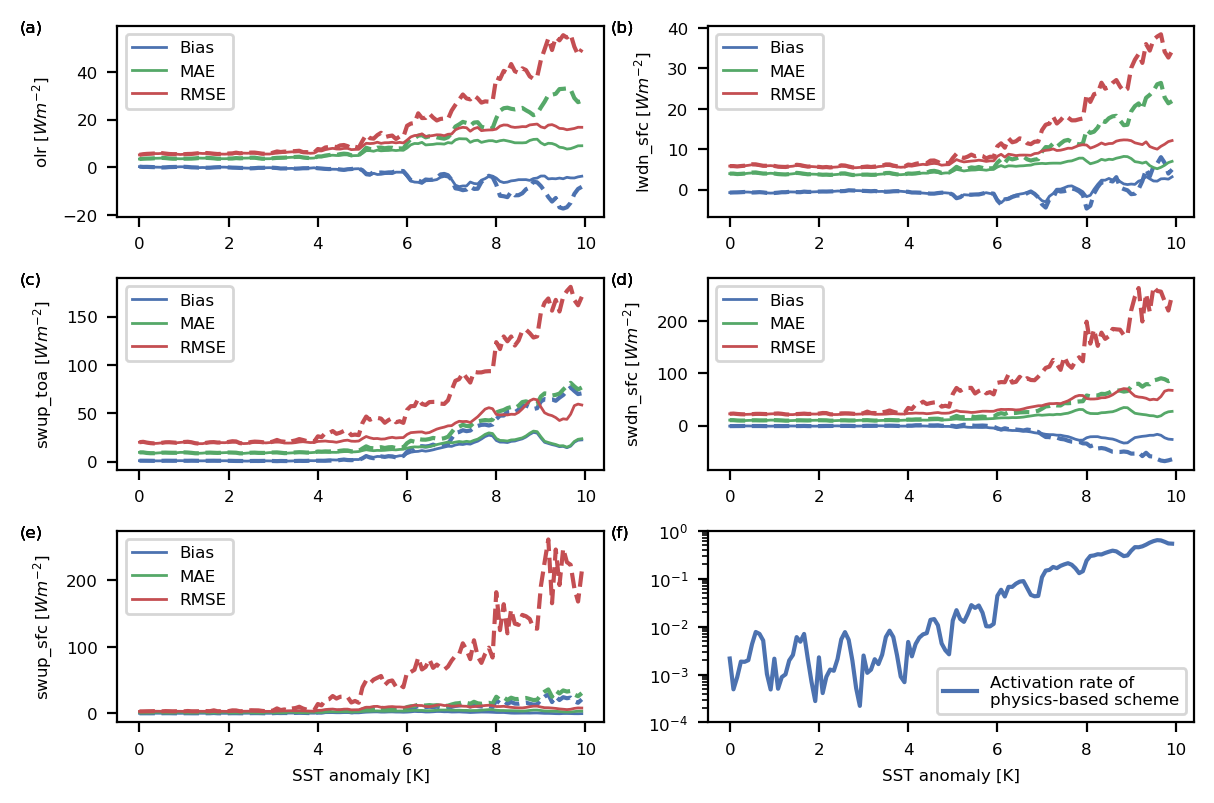

In [31]:

error_name = {'bias':'Bias','mae':'MAE','rmse':'RMSE'}
plt.style.reload_library()
plt.style.use('seaborn-deep')
fig, axs = plt.subplots(nrows=3,ncols=2,
                        figsize=(6,4), dpi=200)
axs = axs.flatten() 
for si, svar in enumerate(ori_var):
    ax=axs[si] 
    print(svar)
    var_name = svar 
    for err_ind in ['bias','mae','rmse']:
    # for err_ind in ['bias']:
    # for err_ind in ['mae']:
        da_plot = ds_nn_3h[f'{err_ind}_{var_name}']
        gm_value = global_mean_xarray(da_plot).values  
        x_label = np.arange(0,10.0,1/12)
        p = ax.plot(x_label,gm_value,'--')
        da_plot = ds_nn_3h[f'adj_{err_ind}_{var_name}']
        gm_value = global_mean_xarray(da_plot).values  
        ax.plot(x_label,gm_value,color =  p[0].get_color(),label=f'{error_name[err_ind]}', linewidth=1)
    ax.set_ylabel(f'{var_name}'+' $[W m^{-2}]$') 
    ax.legend(loc=0)
# plot ratio of RadNN fails
da_plot = ds_nn_3h['nn_lwup_sfc']
gm_value = (1-global_mean_xarray(da_plot).values/999)/2
# axs[5].set_title() 
axs[5].plot(x_label,gm_value,label='Activation rate of\nphysics-based scheme')
axs[5].set_ylim([1e-4,1])
axs[5].set_yscale('log')
axs[5].legend(loc=4)
axs[4].set_xlabel('SST anomaly [K]')
axs[5].set_xlabel('SST anomaly [K]')
abc_list='abcdefghigklmn'
for ai, ax in enumerate(axs ):
    ax.text(-0.2,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes)
    ax.text(-0.2,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes)
abc_list='abcdefghijklmn'
for ai, ax in enumerate(axs ):
    ax.text(-0.2,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes)
    ax.text(-0.2,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes) 
fig.tight_layout()
plt.savefig('fig8_warming.pdf')

olr
lwdn_sfc
swup_toa
swdn_sfc
swup_sfc


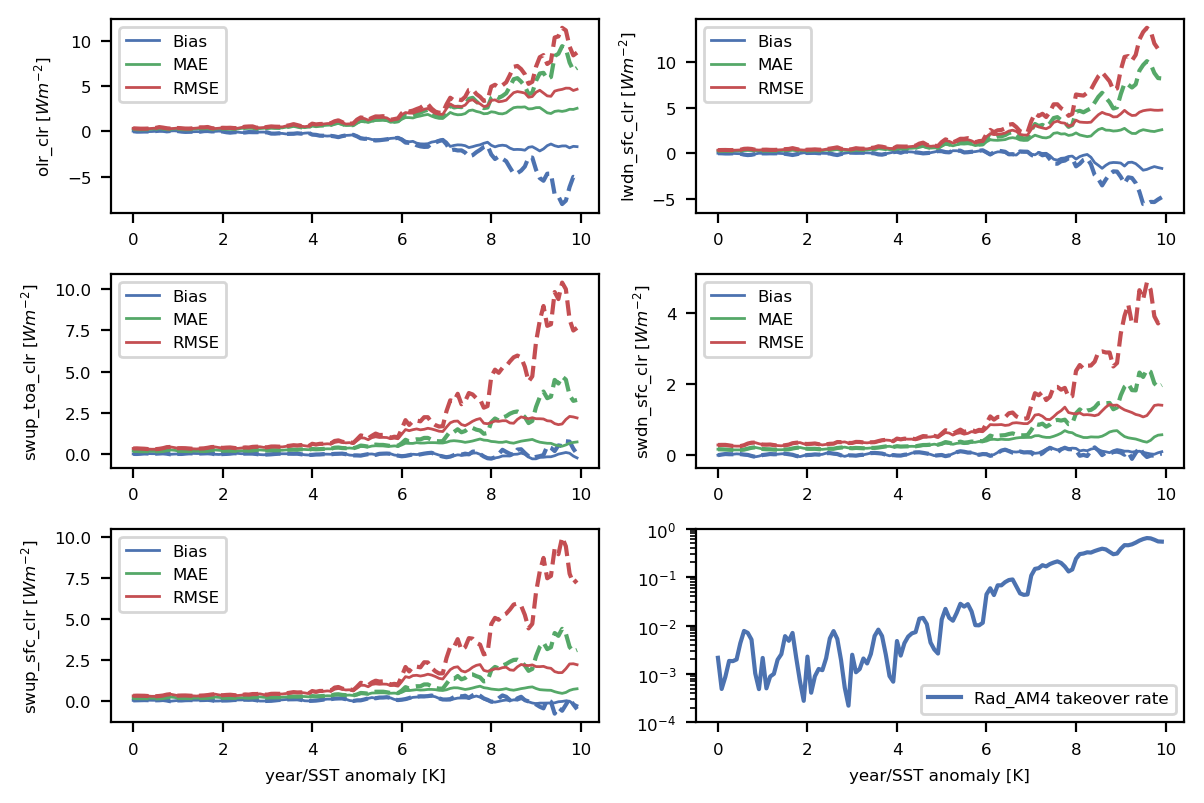

In [20]:

error_name = {'bias':'Bias','mae':'MAE','rmse':'RMSE'}
plt.style.reload_library()
plt.style.use('seaborn-deep')
fig, axs = plt.subplots(nrows=3,ncols=2,
                        figsize=(6,4), dpi=200)
axs = axs.flatten() 
for si, svar in enumerate(ori_var):
    ax=axs[si] 
    print(svar)
    var_name = svar 
    for err_ind in ['bias','mae','rmse']:
    # for err_ind in ['bias']:
        da_plot = ds_nn_3h[f'{err_ind}_{var_name}_clr']
        gm_value = global_mean_xarray(da_plot).values  
        x_label = np.arange(0,10.0,1/12)
        p = ax.plot(x_label,gm_value,'--')
        da_plot = ds_nn_3h[f'adj_{err_ind}_{var_name}_clr']
        gm_value = global_mean_xarray(da_plot).values  
        ax.plot(x_label,gm_value,color =  p[0].get_color(),label=f'{error_name[err_ind]}', linewidth=1)
    ax.set_ylabel(f'{var_name}_clr'+' $[W m^{-2}]$') 
    ax.legend(loc=0)
# plot ratio of RadNN fails
da_plot = ds_nn_3h['nn_lwup_sfc']
gm_value = (1-global_mean_xarray(da_plot).values/999)/2
# axs[5].set_title() 
axs[5].plot(x_label,gm_value,label='Rad_AM4 takeover rate')
axs[5].set_ylim([1e-4,1])
axs[5].set_yscale('log')
axs[5].legend(loc=4)
axs[4].set_xlabel('year/SST anomaly [K]')
axs[5].set_xlabel('year/SST anomaly [K]')
fig.tight_layout()

## map of errors

In [21]:
year_sel = np.arange(2000,2004)
# year_sel = np.arange(2004,2010)
mon_sel=np.arange(1,13)
time_sel = (ds_nn_3h.time.dt.year.isin(year_sel) * ds_nn_3h.time.dt.month.isin(mon_sel))

In [22]:
def plot_var_bias_mae(ds,var_name,level = np.arange(0,300,10), dlevel = np.arange(-10,10.1,0.5)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(6,1),dpi=200,
                            subplot_kw={'projection': ccrs.PlateCarree()})
    axs = axs.flatten()
    da = ds[var_name].mean('time')
    da.plot(ax=axs[0], levels=level, extend='both')  
    axs[0].set_title(f'{da.name} GM: {global_mean_xarray(da).values:4.2f}') 
    
    da = ds[f'bias_{var_name}'].mean('time')
    da.plot(ax=axs[1], levels=dlevel, extend='both')  
    axs[1].set_title(f'{da.name} GM: {global_mean_xarray(da).values:4.2f}') 
    
    da = ds[f'mae_{var_name}'].mean('time')
    da.plot(ax=axs[2], levels=dlevel, extend='both')  
    axs[2].set_title(f'{da.name} GM: {global_mean_xarray(da).values:4.2f}') 
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
        ax.coastlines()
    fig.tight_layout()  

### lw

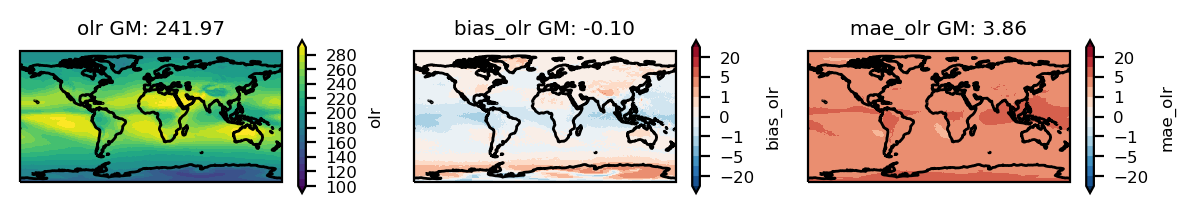

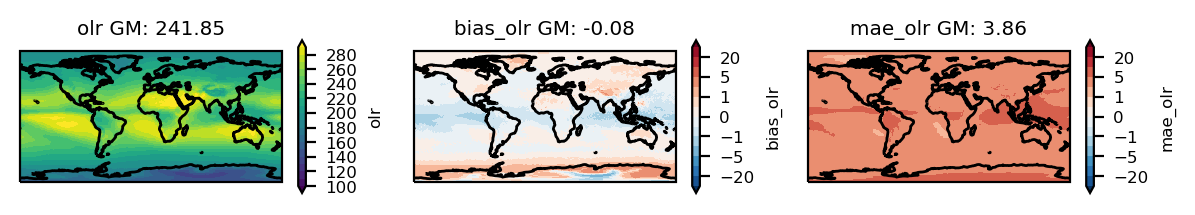

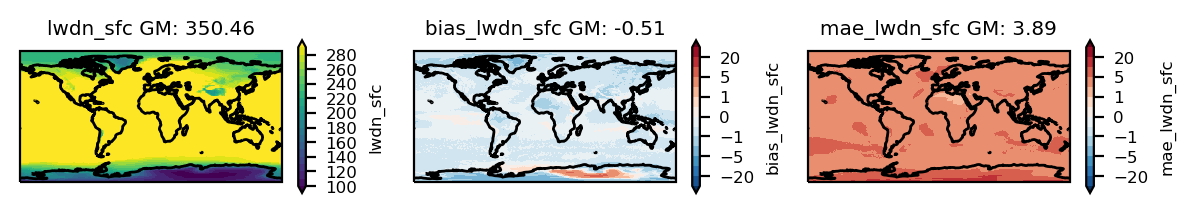

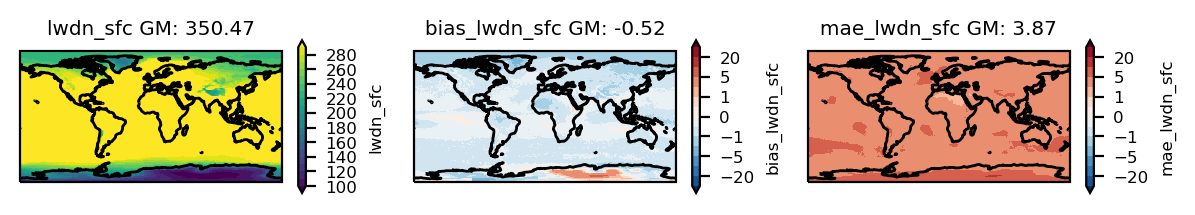

In [23]:
dlevel = np.array([-50, -20, -10, -5,-2,-1,-0.5,0,0.5,1,2,5,10,20,50])  
# dlevel = np.array([-2,-1,-0.5,0,0.5,1,2])  

plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'olr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'olr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'lwdn_sfc',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'lwdn_sfc',level = np.arange(100,300,10), dlevel=dlevel)

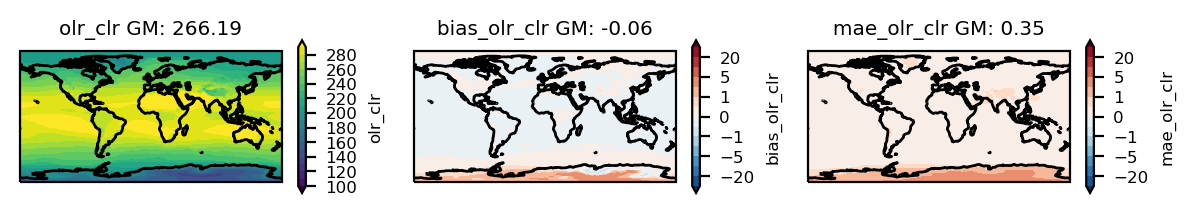

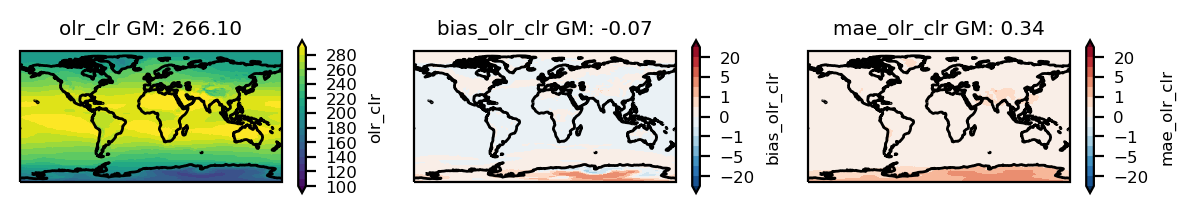

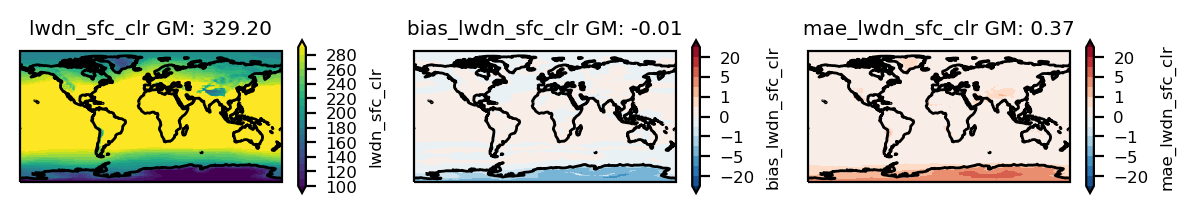

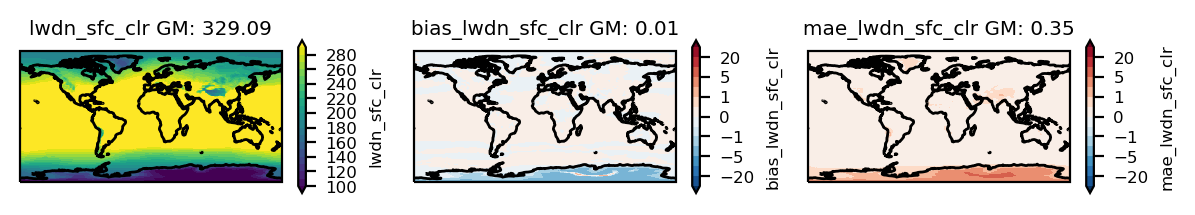

In [24]:

plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'olr_clr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'olr_clr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'lwdn_sfc_clr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'lwdn_sfc_clr',level = np.arange(100,300,10), dlevel=dlevel)

In [25]:

def plot_zonal_tdt_bias_mae(ds,var_name,level = np.arange(-2,2.01,0.1), dlevel = np.arange(-0.5,0.51,0.05)):
    
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(6,1.5),dpi=200)
    axs = axs.flatten()

    axs = axs.flatten()
    da = ds[var_name].mean(['time','lon']).load()*86400
    da.plot(ax=axs[0], levels=level, extend='both')  
    axs[0].set_title(f'{da.name} Mean: {da.mean().values:4.2f}') 
    
    da = ds[f'bias_{var_name}'].mean(['time','lon']).load()*86400
    da.plot(ax=axs[1], levels=dlevel, extend='both')  
    axs[1].set_title(f'{da.name} Mean: {da.mean().values:4.2f}') 
    
    da = ds[f'mae_{var_name}'].mean(['time','lon']).load()*86400
    da.plot(ax=axs[2], levels=dlevel, extend='both')  
    axs[2].set_title(f'{da.name} Mean: {da.mean().values:4.2f}') 
    
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
        ax.invert_yaxis()
    fig.tight_layout()  

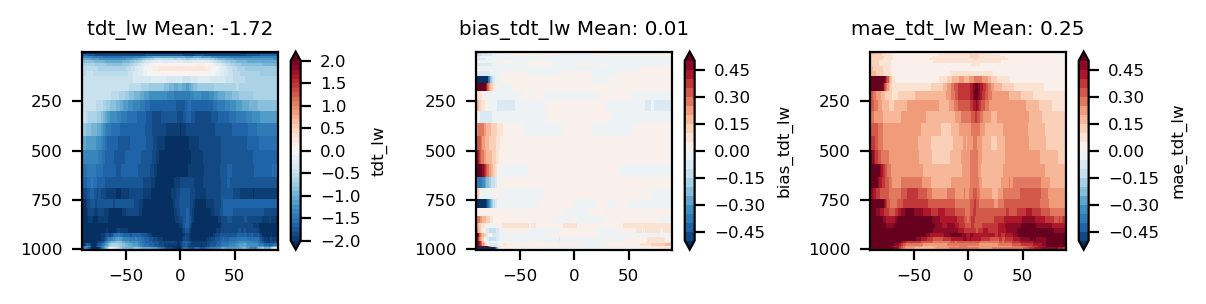

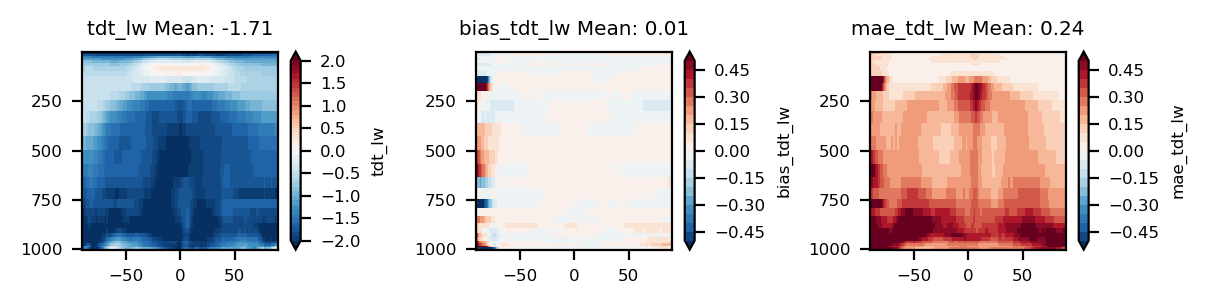

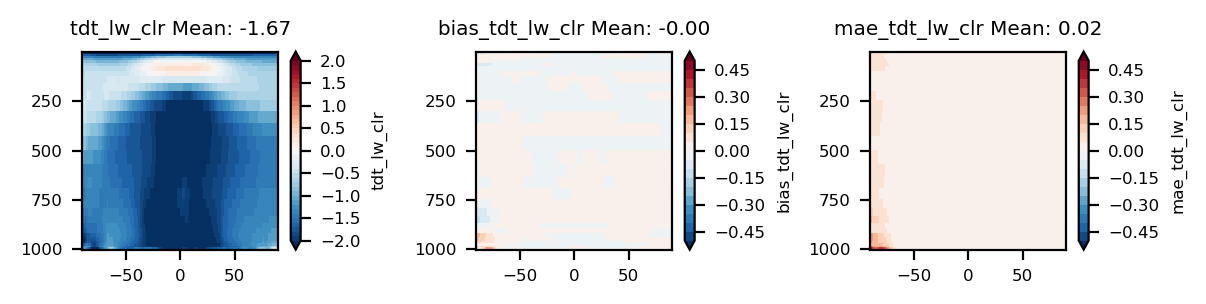

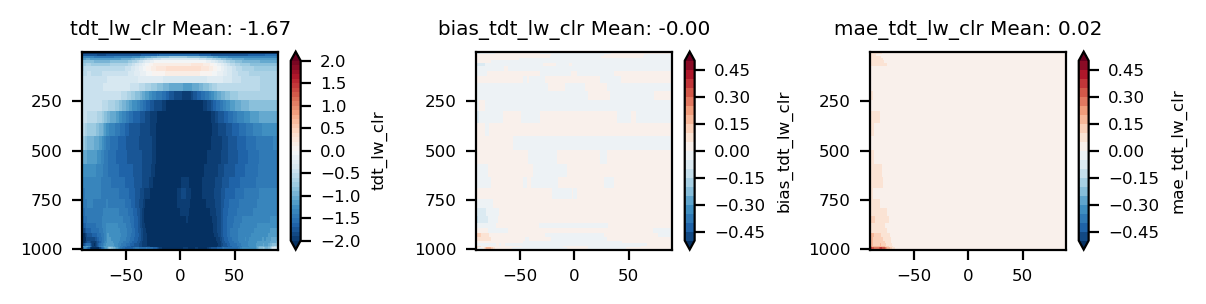

In [26]:
plot_zonal_tdt_bias_mae(ds_nn_3h.sel(time=time_sel), 'tdt_lw')
plot_zonal_tdt_bias_mae(ds_ba_3h.sel(time=time_sel), 'tdt_lw')
plot_zonal_tdt_bias_mae(ds_nn_3h.sel(time=time_sel), 'tdt_lw_clr')
plot_zonal_tdt_bias_mae(ds_ba_3h.sel(time=time_sel), 'tdt_lw_clr')

### sw

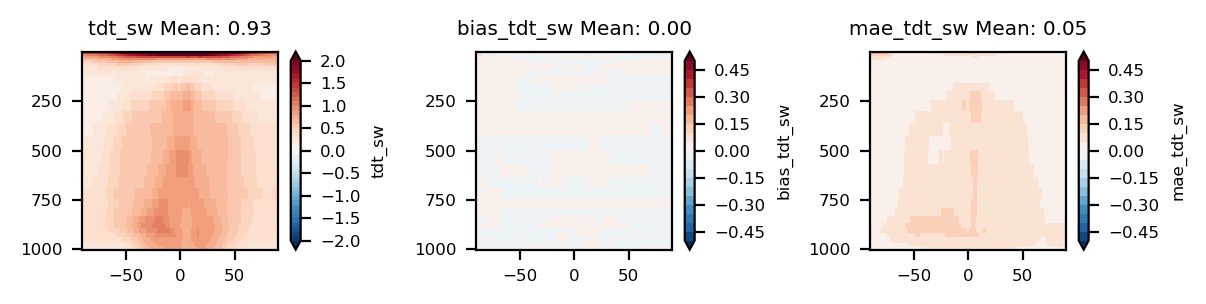

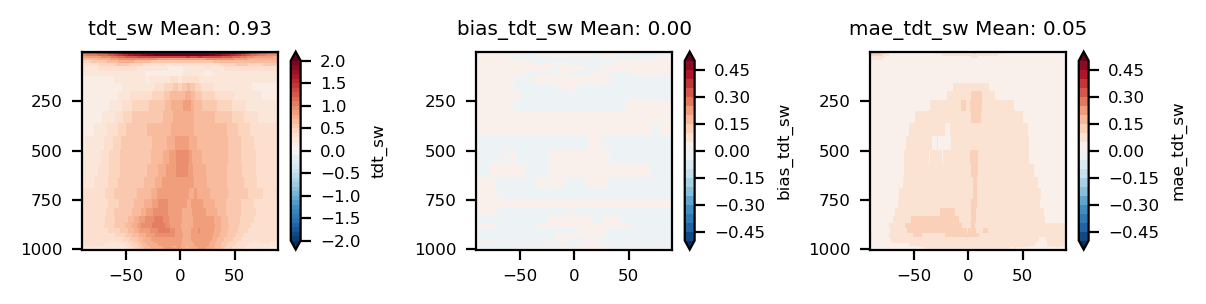

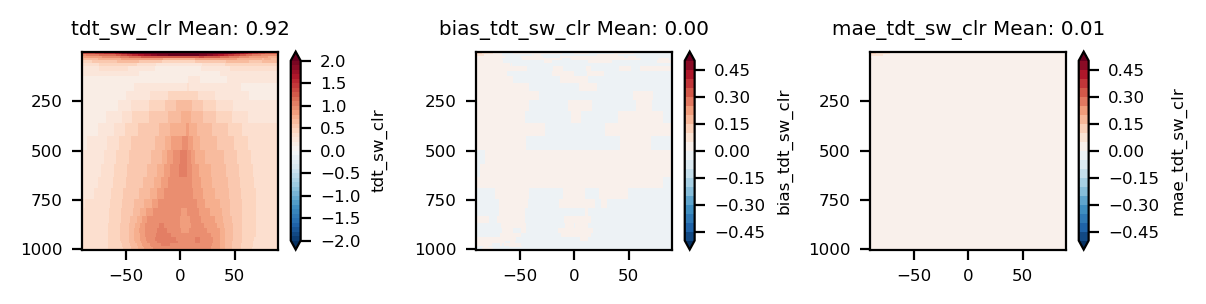

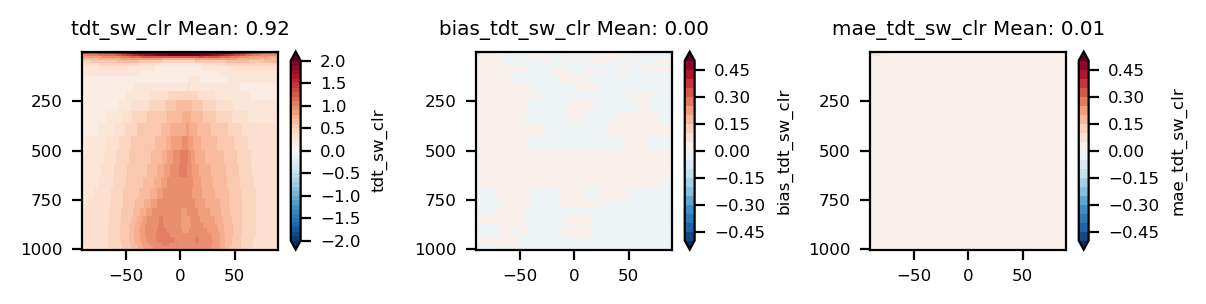

In [27]:
plot_zonal_tdt_bias_mae(ds_nn_3h.sel(time=time_sel), 'tdt_sw')
plot_zonal_tdt_bias_mae(ds_ba_3h.sel(time=time_sel), 'tdt_sw')
plot_zonal_tdt_bias_mae(ds_nn_3h.sel(time=time_sel), 'tdt_sw_clr')
plot_zonal_tdt_bias_mae(ds_ba_3h.sel(time=time_sel), 'tdt_sw_clr')

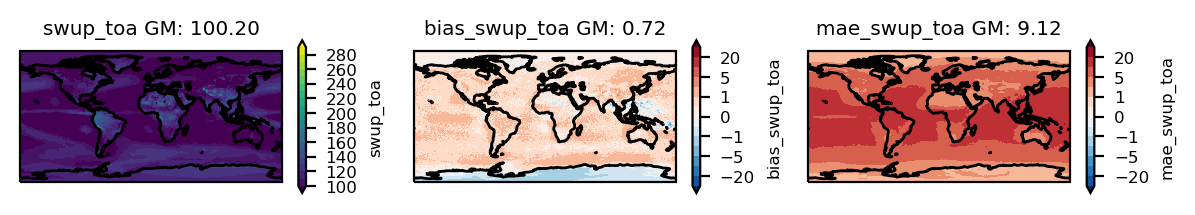

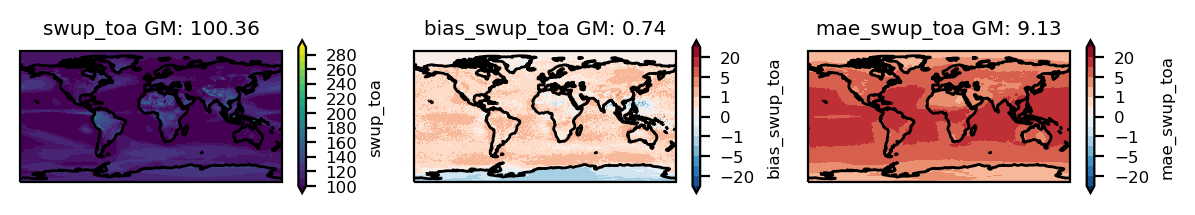

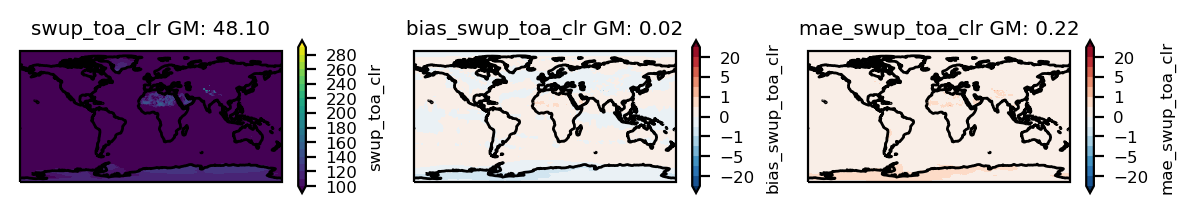

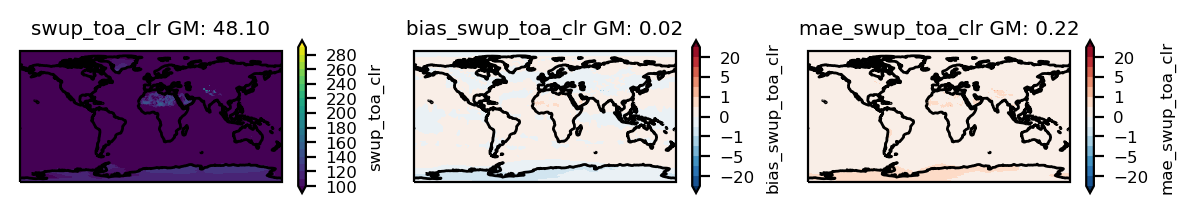

In [28]:
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'swup_toa',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'swup_toa',level = np.arange(100,300,10), dlevel=dlevel)
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'swup_toa_clr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'swup_toa_clr',level = np.arange(100,300,10), dlevel=dlevel) 


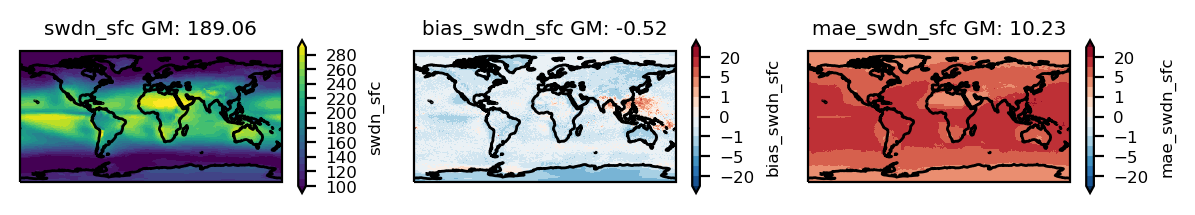

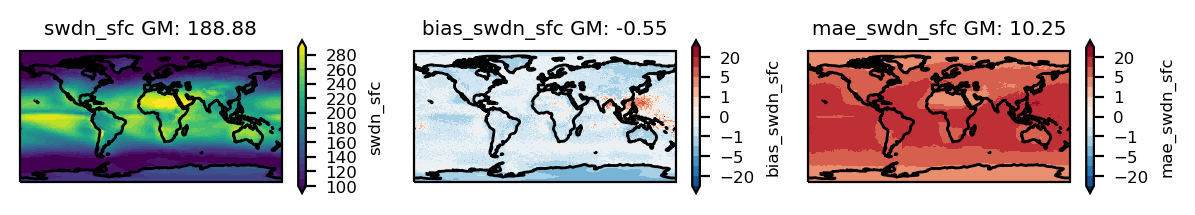

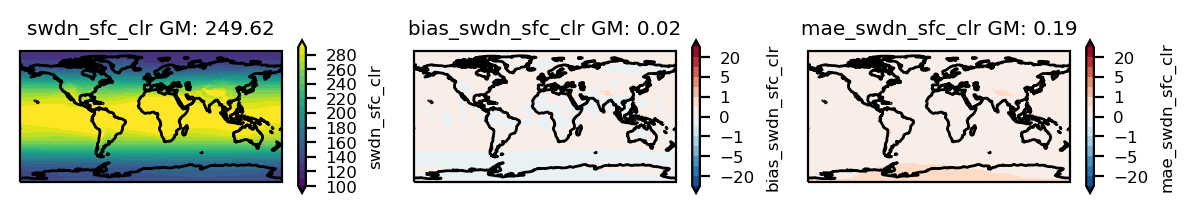

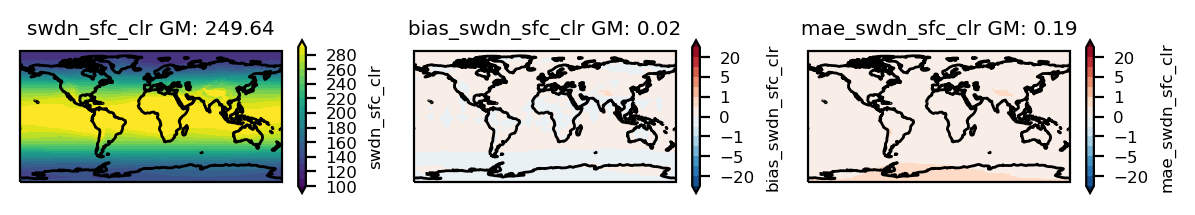

In [29]:
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'swdn_sfc',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'swdn_sfc',level = np.arange(100,300,10), dlevel=dlevel)
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'swdn_sfc_clr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'swdn_sfc_clr',level = np.arange(100,300,10), dlevel=dlevel) 

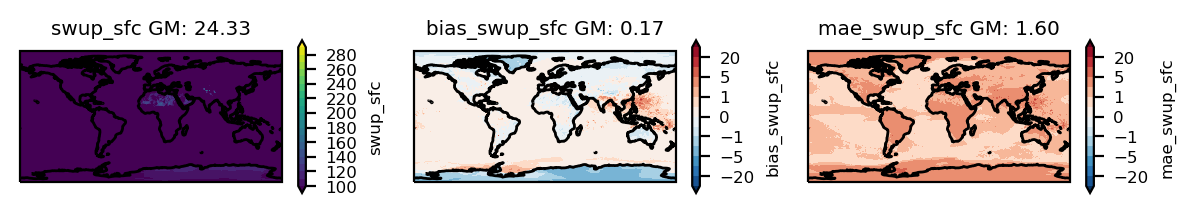

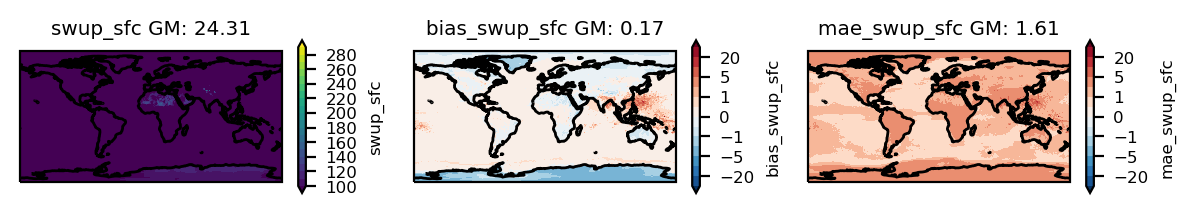

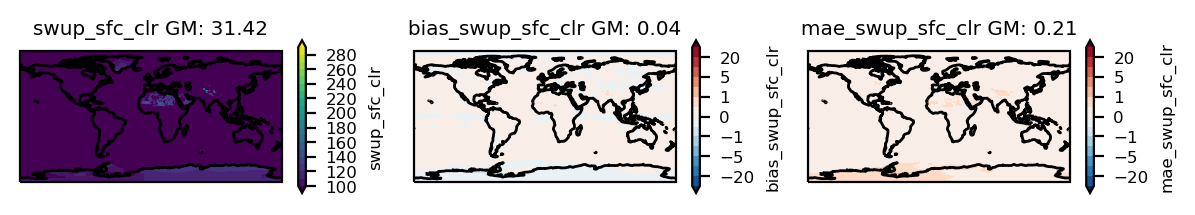

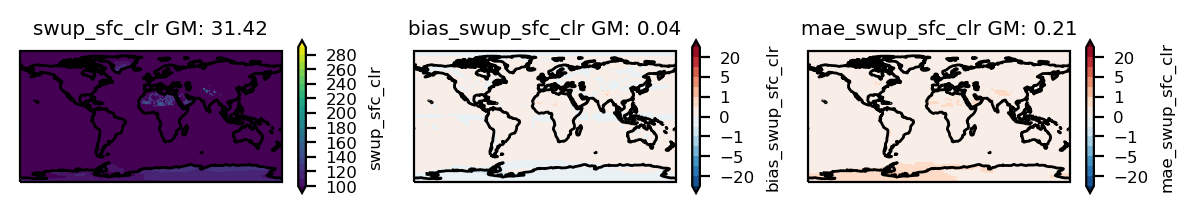

In [30]:
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'swup_sfc',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'swup_sfc',level = np.arange(100,300,10), dlevel=dlevel)
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'swup_sfc_clr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'swup_sfc_clr',level = np.arange(100,300,10), dlevel=dlevel) 